# (day3): 実装演習

本書は、「深層学習後編（day3）レポート」の、実装演習についてのものです。


### 3_1_simple_RNN.ipynb


#### キャプチャ

自身の環境において、最終コードセル[3]までの実行を確認した。


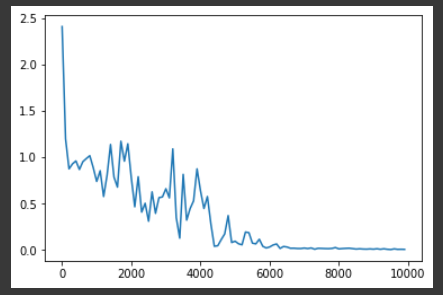

#### 内容

実装演習の際、確認した内容を記録する。


##### 扱っている問題

- 訓練データ<br>
  8 桁の 2 進数。<br>
  ```python
  # largest_numberまで2進数を用意
  binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)
  ```
  ```
  binary=[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]
  ...
  [1 1 1 ... 1 0 1]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 1]]
  ```

- 予測内容<br>
  整数の和の、バイナリ値。<br>
  1 ビット目から 8 ビット目までを時系列データとみなして、和を予測。<br>
  前の時系列 ( 下位の桁 ) からの繰り上がりが、時系列データの特徴を持つ。<br>
  これを RNN で予測する。
  ```
t=0
out_bin=[0 0 0 0 0 0 0 1]
t=1
out_bin=[0 0 0 0 0 0 1 1]
t=2
out_bin=[0 0 0 0 0 0 1 1]
t=3
out_bin=[0 0 0 0 0 0 1 1]
t=4
out_bin=[0 0 0 0 0 0 1 1]
t=5
out_bin=[0 0 0 0 0 0 1 1]
t=6
out_bin=[0 0 0 0 0 0 1 1]
t=7
out_bin=[1 0 0 0 0 0 1 1]
iters:7800
Loss:0.004276841211205909
Pred:[1 0 0 0 0 0 1 1]
True:[1 0 0 0 0 0 1 1]
102 + 29 = 131
  ```


##### 扱っている問題[try] weight_init_stdやlearning_rate, hidden_layer_sizeを変更してみよう

```python
# weight_init_std = 1
weight_init_std = 0
```


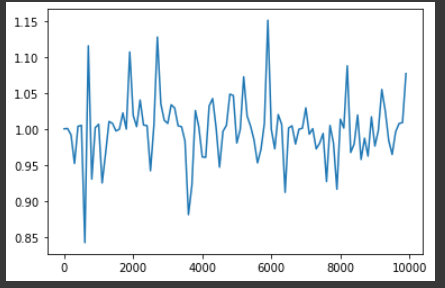

<!-- - TODO: 最適な値を探す方法? -->


##### [try] 重みの初期化方法を変更してみよう

```python
def init_he(input_layer_size, hidden_layer_size):
  return np.random.randn(input_layer_size, hidden_layer_size) / np.sqrt(input_layer_size) * np.sqrt(2);
```

```python
# He
W_in = init_he(input_layer_size, hidden_layer_size)
W_out = init_he(hidden_layer_size, output_layer_size)
W = init_he(hidden_layer_size, hidden_layer_size)
```


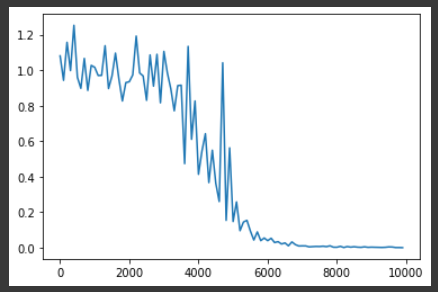

##### [try] 中間層の活性化関数を変更してみよう

###### 導関数 `d_tanh`

$$
\tanh{x} = \frac{\mathrm{e}^x - \mathrm{e}^x}{\mathrm{e}^x + \mathrm{e}^x}
$$

$$
(\tanh{x})' = \frac{1}{\cosh{x}^2}
$$

- NOTE: [【大学数学】双曲線関数とは何か【解析学】](https://youtu.be/Yvcngy6xtio?t=373)

```python
def d_tanh(x):
  return (1 / np.cosh(x) ** 2)
```


```python
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        # z[:,t+1] = functions.sigmoid(u[:,t+1])
```

```python
        # delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])
        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * d_tanh(u[:,t+1])
```


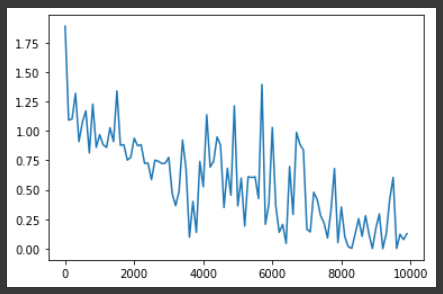

<!-- - TODO: 出力層の活性化関数に対応する微分は? -->


### 3_2_tf_languagemodel/predict_word.ipynb


#### キャプチャ

自身の環境において、最終コードセル[4]までの実行を確認した。


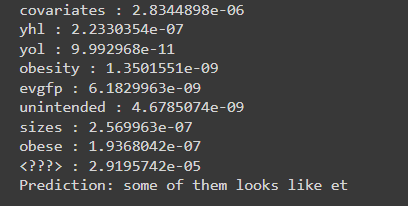

#### 内容

実装演習の際、確認した内容を記録する。


- NOTE: Google Colaboratory では、以下の設定を追加して、 runntime を restart すること。
  ```python
  %tensorflow_version 1.x
  ```
  以下で、エラーとなるため。
  ```python
  # logging levelを変更
  tf.logging.set_verbosity(tf.logging.ERROR)
  ```


##### 扱っている問題

- 訓練データ<br>
  `class Corpus` 。<br>
  `Corpus` が読み込んで学習する対象のデータは、<br>
  ```python
        self.corpus_file = "./corpus/**/*.txt"
  ```
  `train()` 関数によって、既に学習されている。<br>
  学習した結果は、以下に保存される。<br>
  ```python
          self.dictionary_filename = "./data_for_predict/word_dict.dic"
  ```

- 予測内容<br>
  ```python
    def predict(self, seq):
        """
        文章を入力したときに次に来る単語を予測する
        :param seq: 予測したい単語の直前の文字列。chunk_size 以上の単語数が必要。
        :return:
        """
  ```
  ```
  Prediction: some of them looks like et
  ```


### 3_3_predict_sin.ipynb


#### キャプチャ

自身の環境において、最終コードセル[3]までの実行を確認した。


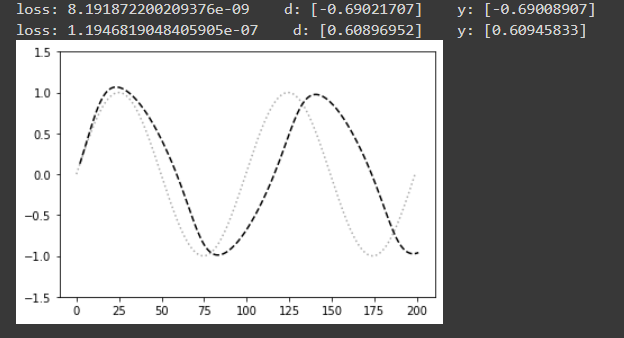

#### 内容

実装演習の際、確認した内容を記録する。


##### 扱っている問題

- 訓練データ<br>
  ```python
# sin曲線
round_num = 10
div_num = 500
ts = np.linspace(0, round_num * np.pi, div_num)
f = np.sin(ts)
  ```

キャプチャの様に、実線の正解に対して、点線が予測した結果。


##### [try] iters_numを100にしよう

学習がまだ進んでいない。


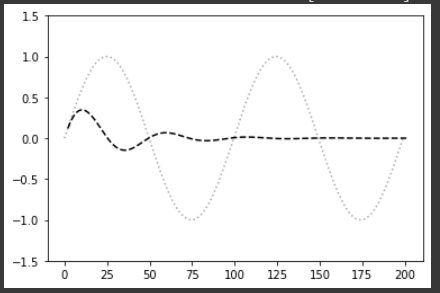

##### [try] maxlenを5, iters_numを500, 3000(※時間がかかる)にしよう

```python
maxlen = 5
...
# iters_num = 500
# iters_num = 100
iters_num = 5000
```


高い精度まで学習。

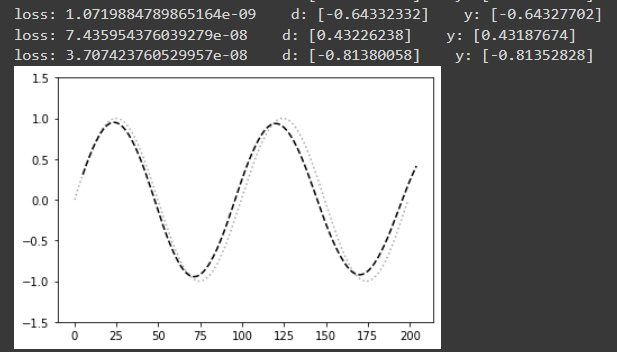